# Analysing NYC Open Data 🗽🌇

First step, as always, import the necessary packages:

In [125]:
import numpy as np
import pandas as pd
from plotnine import *
import janitor

## Historic Arrests since 2006

In [126]:
data = pd.read_csv("C:/Users/mathi/Downloads/NYC Arrests/NYPD_Arrests_Data__Historic_.csv",
                   parse_dates=["ARREST_DATE"])

In [127]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5308876 entries, 0 to 5308875
Data columns (total 19 columns):
 #   Column             Dtype         
---  ------             -----         
 0   ARREST_KEY         int64         
 1   ARREST_DATE        datetime64[ns]
 2   PD_CD              float64       
 3   PD_DESC            object        
 4   KY_CD              float64       
 5   OFNS_DESC          object        
 6   LAW_CODE           object        
 7   LAW_CAT_CD         object        
 8   ARREST_BORO        object        
 9   ARREST_PRECINCT    int64         
 10  JURISDICTION_CODE  float64       
 11  AGE_GROUP          object        
 12  PERP_SEX           object        
 13  PERP_RACE          object        
 14  X_COORD_CD         float64       
 15  Y_COORD_CD         float64       
 16  Latitude           float64       
 17  Longitude          float64       
 18  Lon_Lat            object        
dtypes: datetime64[ns](1), float64(7), int64(2), object(9)
memory us

In [128]:
data.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat
0,236791704,2021-11-22,581.0,NaN,NaN,NaN,PL 2225001,M,M,28,0.0,45-64,M,BLACK,997427.0,230378.0,40.799009,-73.952409,POINT (-73.95240854099995 40.799008797000056)
1,237354740,2021-12-04,153.0,RAPE 3,104.0,RAPE,PL 1302502,F,B,41,0.0,25-44,M,WHITE HISPANIC,1013232.0,236725.0,40.816392,-73.895296,POINT (-73.89529641399997 40.816391847000034)
2,236081433,2021-11-09,681.0,"CHILD, ENDANGERING WELFARE",233.0,SEX CRIMES,PL 2601001,M,Q,113,0.0,25-44,M,BLACK,1046367.0,186986.0,40.679700,-73.776047,POINT (-73.77604736799998 40.67970040800003)
3,32311380,2007-06-18,511.0,"CONTROLLED SUBSTANCE, POSSESSION 7",235.0,DANGEROUS DRUGS,PL 2200300,M,Q,27,1.0,18-24,M,BLACK,NaN,NaN,NaN,NaN,NaN
4,192799737,2019-01-26,177.0,SEXUAL ABUSE,116.0,SEX CRIMES,PL 1306503,F,M,25,0.0,45-64,M,BLACK,1000555.0,230994.0,40.800694,-73.941109,POINT (-73.94110928599997 40.800694331000045)


In [129]:
(data.isna().sum() / data.shape[0] * 100)

ARREST_KEY           0.000000
ARREST_DATE          0.000000
PD_CD                0.005896
PD_DESC              0.172711
KY_CD                0.172711
OFNS_DESC            0.172711
LAW_CODE             0.003692
LAW_CAT_CD           0.381512
ARREST_BORO          0.000151
ARREST_PRECINCT      0.000000
JURISDICTION_CODE    0.000188
AGE_GROUP            0.000320
PERP_SEX             0.000000
PERP_RACE            0.000000
X_COORD_CD           0.000019
Y_COORD_CD           0.000019
Latitude             0.000019
Longitude            0.000019
Lon_Lat              0.000019
dtype: float64

Almost no missing values, which is great!

### Number of arrests by year, by month in year, by week in year and by day of week

In [130]:
data["year"] = data["ARREST_DATE"].dt.year
data["month"] = data["ARREST_DATE"].dt.month
data["weekday"] = data["ARREST_DATE"].dt.weekday
data["week"] = data["ARREST_DATE"].dt.isocalendar().week

In [131]:
(data
    .value_counts("year")
    .sort_index()
)

year
2006    371934
2007    403231
2008    401529
2009    421316
2010    422322
2011    412859
2012    396280
2013    393809
2014    387727
2015    339470
2016    314864
2017    286225
2018    246773
2019    214617
2020    140413
2021    155507
dtype: int64

In [132]:
(data
    .value_counts("month")
    .sort_index()
)

month
1     469204
2     435786
3     483587
4     452894
5     471045
6     437235
7     441819
8     454283
9     427730
10    457755
11    405409
12    372129
dtype: int64

In [133]:
(data
    .value_counts("weekday")
    .sort_index()
)

weekday
0    574148
1    836952
2    930276
3    889033
4    851517
5    717572
6    509378
dtype: int64

In [134]:
(data
    .value_counts("week")
    .sort_index()
)

week
1      93842
2     109830
3     112855
4     105677
5     105076
6     107335
7     108911
8     106402
9     112224
10    114020
11    110471
12    107310
13    102921
14    107366
15    106956
16    105428
17    103706
18    106124
19    109380
20    109385
21    104653
22    100267
23    106417
24    102061
25    102693
26     96169
27     96802
28    101971
29    100615
30    100389
31    102454
32    105771
33    104706
34    100426
35     97475
36     98361
37    100940
38    103367
39     97426
40    105678
41    107355
42    105953
43    101484
44     91673
45     97060
46    100762
47     90838
48     89861
49     98729
50     93792
51     81212
52     62936
53     13361
dtype: int64

### Which demographies are responsible for which gravity of offenses and for which offenses in particular?

Fraction of arrests by gender:

In [135]:
(data
    .value_counts("PERP_SEX")
    .reset_index(name="count")
    .assign(count = lambda df: df["count"] / df["count"].sum())
)

,PERP_SEX,count
0,M,0.83208
1,F,0.16792


In [136]:
data.columns

Index(['ARREST_KEY', 'ARREST_DATE', 'PD_CD', 'PD_DESC', 'KY_CD', 'OFNS_DESC',
       'LAW_CODE', 'LAW_CAT_CD', 'ARREST_BORO', 'ARREST_PRECINCT',
       'JURISDICTION_CODE', 'AGE_GROUP', 'PERP_SEX', 'PERP_RACE', 'X_COORD_CD',
       'Y_COORD_CD', 'Latitude', 'Longitude', 'Lon_Lat', 'year', 'month',
       'weekday', 'week'],
      dtype='object')

Gravity of arrests by gender:

In [137]:
(data
 .sample(n=1000)
 .dropna(subset=["PERP_SEX", "LAW_CAT_CD"])
 .value_counts(["PERP_SEX", "LAW_CAT_CD"])
 .reset_index(name="count")
 .assign(count = lambda df: df["count"] / df.groupby("PERP_SEX")["count"].transform("sum"))
)

,PERP_SEX,LAW_CAT_CD,count
0,M,M,0.657993
1,M,F,0.260223
2,F,M,0.702128
3,M,V,0.075589
4,F,F,0.287234
5,M,I,0.006196
6,F,V,0.010638


Relative Number of Arrests by Race over time:

In [138]:
(data
    .value_counts(["year", "PERP_RACE"])
    .reset_index(name="count")
    .dropna()
)

,year,PERP_RACE,count
0,2010,BLACK,208789
1,2009,BLACK,208297
2,2011,BLACK,202284
3,2007,BLACK,196511
4,2008,BLACK,195775
...,...,...,...
108,2020,UNKNOWN,653
109,2019,AMERICAN INDIAN/ALASKAN NATIVE,597
110,2021,UNKNOWN,587
111,2021,AMERICAN INDIAN/ALASKAN NATIVE,443


Relative number of arrests by borough over time:

In [139]:
(data
    .value_counts(["year", "ARREST_BORO"])
    .reset_index(name="count")
    .dropna()
    .assign(count = lambda df: df["count"] / df.groupby("year")["count"].transform("sum"))
)

,year,ARREST_BORO,count
0,2010,K,0.279171
1,2011,K,0.285240
2,2009,K,0.277402
3,2009,M,0.271834
4,2012,K,0.285963
...,...,...,...
75,2015,S,0.032751
76,2018,S,0.042241
77,2019,S,0.042084
78,2021,S,0.046371


Arrests over time by age groups and race:

In [140]:
(data
    .value_counts("AGE_GROUP")
    .reset_index(name="count")
    .query("count > 20")
)

,AGE_GROUP,count
0,25-44,2482601
1,18-24,1375134
2,45-64,981931
3,<18,422931
4,65+,46084


In [141]:
(data
    .assign(age_count = lambda df: df.groupby("AGE_GROUP")["AGE_GROUP"].transform("count"))
    .query("age_count > 20")
    .value_counts(["AGE_GROUP", "PERP_RACE", "year"])
    .reset_index(name="count")
    .assign(count = lambda df: df["count"] / df.groupby(["AGE_GROUP", "year"])["count"].transform("sum"))
)

,AGE_GROUP,PERP_RACE,year,count
0,25-44,BLACK,2009,0.468384
1,25-44,BLACK,2007,0.464075
2,25-44,BLACK,2010,0.465887
3,25-44,BLACK,2008,0.460847
4,25-44,BLACK,2006,0.469325
...,...,...,...,...
560,65+,AMERICAN INDIAN/ALASKAN NATIVE,2020,0.002857
561,65+,AMERICAN INDIAN/ALASKAN NATIVE,2017,0.001706
562,65+,AMERICAN INDIAN/ALASKAN NATIVE,2006,0.001739
563,65+,AMERICAN INDIAN/ALASKAN NATIVE,2008,0.000766


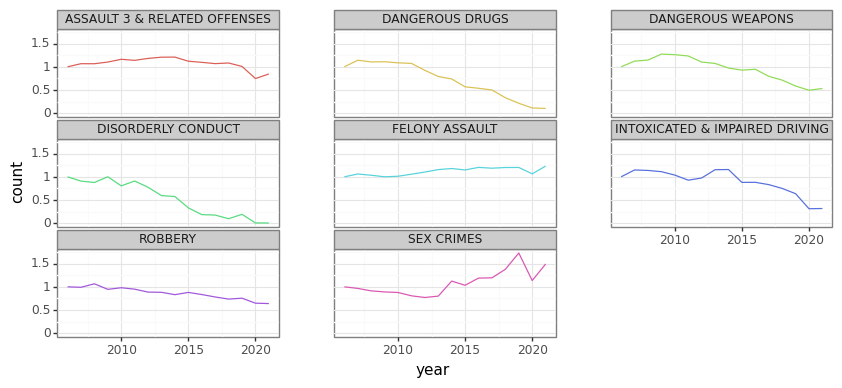

<ggplot: (181260286529)>

In [142]:
(
    ggplot(data=(data
                 .query('OFNS_DESC in ["DANGEROUS DRUGS", "ASSAULT 3 & RELATED OFFENSES", "FELONY ASSAULT", "DANGEROUS WEAPONS", "ROBBERY", "INTOXICATED & IMPAIRED DRIVING", "SEX CRIMES", "DISORDERLY CONDUCT"]')
                 .value_counts(["year", "OFNS_DESC"])
                 .reset_index(name="count")
                 .sort_values(["OFNS_DESC", "year"])
                 .assign(count=lambda df: df["count"] / df.groupby("OFNS_DESC")["count"].transform("first"))
                 ),
           mapping=aes(x="year", y="count", colour="OFNS_DESC")) +
    geom_line() +
    facet_wrap("~ OFNS_DESC") +
    theme_bw() +
    theme(figure_size=[10, 4],
          subplots_adjust={"hspace" : 0.25, 'wspace' :  0.25},
          legend_position="none")
)

## Payroll Data 💲

In [143]:
# read in 
data = pd.read_csv("C:/Users/mathi/Downloads/NYC Citywide Pay Roll/Citywide_Payroll_Data__Fiscal_Year_.csv")

# clean col names
data = janitor.clean_names(data)

# transform to date
data["agency_start_date"] = pd.to_datetime(data["agency_start_date"], errors="coerce")

C:\Users\mathi\AppData\Local\Temp\ipykernel_6176\1222535573.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.


In [144]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5109775 entries, 0 to 5109774
Data columns (total 17 columns):
 #   Column                      Dtype         
---  ------                      -----         
 0   fiscal_year                 int64         
 1   payroll_number              float64       
 2   agency_name                 object        
 3   last_name                   object        
 4   first_name                  object        
 5   mid_init                    object        
 6   agency_start_date           datetime64[ns]
 7   work_location_borough       object        
 8   title_description           object        
 9   leave_status_as_of_june_30  object        
 10  base_salary                 float64       
 11  pay_basis                   object        
 12  regular_hours               float64       
 13  regular_gross_paid          float64       
 14  ot_hours                    float64       
 15  total_ot_paid               float64       
 16  total_other_pay   

In [145]:
data.head()

,fiscal_year,payroll_number,agency_name,last_name,first_name,mid_init,agency_start_date,work_location_borough,title_description,leave_status_as_of_june_30,base_salary,pay_basis,regular_hours,regular_gross_paid,ot_hours,total_ot_paid,total_other_pay
0,2020,17.0,OFFICE OF EMERGENCY MANAGEMENT,BEREZIN,MIKHAIL,NaN,2015-08-10,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.0
1,2020,17.0,OFFICE OF EMERGENCY MANAGEMENT,GEAGER,VERONICA,M,2016-09-12,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.0
2,2020,17.0,OFFICE OF EMERGENCY MANAGEMENT,RAMANI,SHRADDHA,NaN,2016-02-22,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.0
3,2020,17.0,OFFICE OF EMERGENCY MANAGEMENT,ROTTA,JONATHAN,D,2013-09-16,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.0
4,2020,17.0,OFFICE OF EMERGENCY MANAGEMENT,WILSON II,ROBERT,P,2018-04-30,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.0


In [146]:
data.value_counts("fiscal_year").sort_index()

fiscal_year
2014    509525
2015    577880
2016    544817
2017    562266
2018    546161
2019    592431
2020    590210
2021    573477
2022    613008
dtype: int64

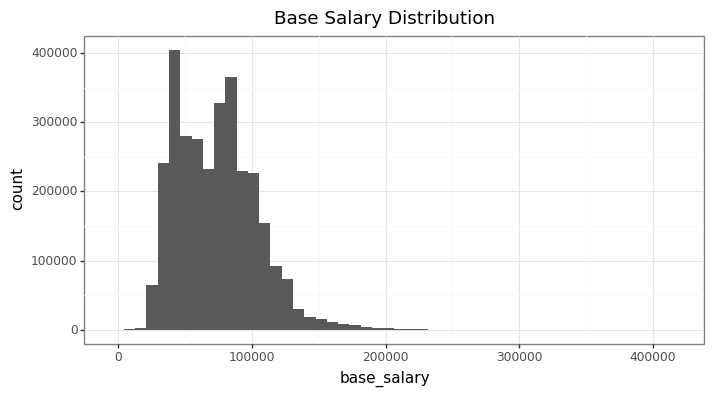

<ggplot: (181260286550)>

In [147]:
# Distribution of salaries

(
    ggplot(data=(data
                 .query("base_salary > 1000")
                 ),
           mapping=aes(x="base_salary")) +
    geom_histogram(bins=50) +
    labs(title = "Base Salary Distribution") +
    theme_bw() +
    theme(figure_size=[8, 4])
)


Data is available from 2014 to 2022.

### Which agencies pay best and worst?

In [148]:
(data
    .assign(agency_count=lambda df: df.groupby("agency_name")["agency_name"].transform("count"))
    .query("agency_count > 50")
    .groupby("agency_name", as_index=False)
    .agg(
        min_salary = ("base_salary", np.min),
        median_salary = ("base_salary", np.median),
        mean_salary = ("base_salary", np.mean),
        max_salary = ("base_salary", np.max),
        observations = ("agency_name", "count")
    )
    .sort_values("median_salary", ascending=False)
    .style.bar(subset=["median_salary", "max_salary"], color="forestgreen")
 )


,agency_name,min_salary,median_salary,mean_salary,max_salary,observations
62,FINANCIAL INFO SVCS AGENCY,13.500000,111105.000000,107892.793726,243171.000000,4189
82,OFFICE OF COLLECTIVE BARGAININ,13.900000,110149.000000,107755.048935,243171.000000,169
44,DEPT OF ED PEDAGOGICAL,22500.000000,89773.000000,90617.278288,363346.000000,992336
69,INDEPENDENT BUDGET OFFICE,11.000000,85078.500000,94313.531317,218774.000000,372
76,NYC DEPT OF VETERANS' SERVICES,11.550000,82990.500000,94693.121455,227786.000000,268
86,OFFICE OF THE ACTUARY,10.000000,82803.500000,103150.642857,311885.000000,392
73,MAYORS OFFICE OF CONTRACT SVCS,15.750000,82400.000000,88211.528653,227786.000000,1151
88,OFFICE OF THE MAYOR,1.000000,82000.000000,89882.804394,291139.000000,6282
49,DEPT OF INFO TECH & TELECOMM,10.000000,80640.000000,83447.343172,247577.000000,15974
24,CONFLICTS OF INTEREST BOARD,31534.000000,80546.000000,93747.980159,223735.000000,252


### Which boroughs have best paid jobs?

In [149]:
(data
    # .assign(boro_count=lambda df: df.groupby("work_location_borough")["work_location_borough"].transform("count"))
    # .query("boro_count > 100")
    .groupby("work_location_borough", as_index=False)
    .agg(
        min_salary = ("base_salary", np.min),
        median_salary = ("base_salary", np.median),
        mean_salary = ("base_salary", np.mean),
        max_salary = ("base_salary", np.max),
        observations = ("agency_name", "count")
    )
    .sort_values("median_salary", ascending=False)
    .style.bar(subset=["median_salary", "max_salary"], color="forestgreen")
 )


,work_location_borough,min_salary,median_salary,mean_salary,max_salary,observations
20,WASHINGTON DC,15.000000,128909.000000,111748.162712,178190.000000,59
11,OTHER,5.000000,108811.000000,112452.202560,363346.000000,107514
0,ALBANY,13.000000,74247.500000,74938.936290,203996.000000,124
19,ULSTER,10.240000,69740.000000,72588.205196,188100.000000,2602
21,WESTCHESTER,10.240000,64397.000000,64915.474662,195295.000000,4513
17,SCHOHARIE,31.290000,64397.000000,65144.935751,162424.000000,233
18,SULLIVAN,10.240000,62776.000000,65947.477507,231796.000000,1079
14,Queens,1.000000,62400.000000,71758.649530,197496.000000,660
16,Richmond,15.010000,60569.000000,69804.469375,190000.000000,112
4,DELAWARE,10.240000,60156.000000,59782.500112,188099.000000,717


### What are the best and worst paid jobs?

In [150]:
# Looking at the 100 most frequent jobs
(data
 .groupby("title_description")
 .agg(
     min_salary=("base_salary", np.min),
     median_salary=("base_salary", np.median),
     mean_salary=("base_salary", np.mean),
     max_salary=("base_salary", np.max),
     observations=("agency_name", "count")
 )
 .query("observations > 10000")
 .sort_values("median_salary", ascending=False)
 .style.bar(subset=["median_salary", "max_salary"], color="forestgreen")
 )


,min_salary,median_salary,mean_salary,max_salary,observations
title_description,,,,,
PRINCIPAL,110.290000,156181.000000,156857.232884,223355.000000,17966
COMPUTER SYSTEMS MANAGER,40.870000,125386.000000,128089.926735,241116.000000,12910
ASSISTANT PRINCIPAL,110.290000,121810.000000,120316.358361,179139.000000,35154
LIEUTENANT,75759.000000,112574.000000,111168.236825,164443.000000,29621
CAPTAIN,50446.000000,112574.000000,114886.649263,176449.000000,17831
SERGEANT-,72418.000000,109360.000000,105106.085050,118056.000000,21693
SCHOOL PSYCHOLGIST,51186.000000,101237.000000,98083.609729,135088.000000,14431
SERGEANT,76237.000000,99053.000000,95869.075286,106175.000000,18556
SCHOOL SOCIAL WORKER,110.290000,98633.000000,96041.683311,135088.000000,18106


### Which agencies and jobs have the most overtime?

First let's look at the distribution of overtime for those that had it:

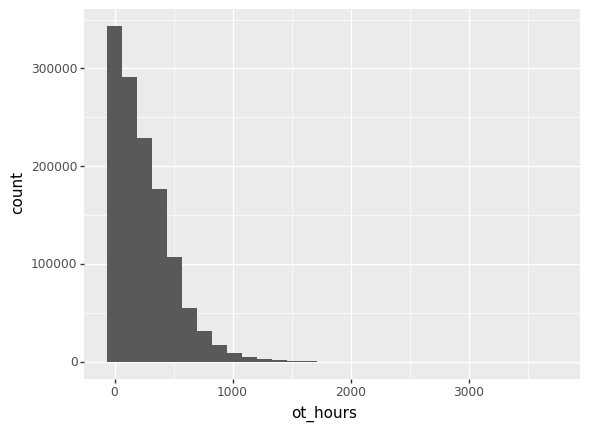

<ggplot: (181359775414)>

In [151]:
(
    ggplot(data=data.query("ot_hours > 0"),
           mapping=aes(x="ot_hours")) +
    geom_histogram(bins=30)
)

In [152]:
(data
    .query("ot_hours > 0")
    .groupby("agency_name")
    .agg(
        min_ot=("ot_hours", np.min),
        median_ot=("ot_hours", np.median),
        max_ot = ("ot_hours", np.max),
        n = ("ot_hours", "count")
    )
    .reset_index()
    .sort_values("median_ot", ascending=False)
    .style.bar("median_ot")
)


,agency_name,min_ot,median_ot,max_ot,n
54,FIRE DEPARTMENT,0.250000,377.500000,2965.000000,146548
55,GUTTMAN COMMUNITY COLLEGE,0.500000,305.125000,1093.500000,114
32,DEPARTMENT OF CORRECTION,0.100000,301.500000,3692.900000,92680
37,DEPARTMENT OF SANITATION,0.250000,281.500000,2018.250000,85765
4,BOARD OF ELECTION,0.500000,273.000000,2461.250000,7916
82,POLICE DEPARTMENT,0.020000,241.420000,2451.570000,380652
5,BOROUGH PRESIDENT-BRONX,11.500000,220.625000,456.500000,26
39,DEPT OF CITYWIDE ADMIN SVCS,0.250000,220.500000,2986.000000,13538
86,Police Department,0.250000,198.670000,1182.750000,46239
71,NYC HOUSING AUTHORITY,0.250000,198.250000,2525.500000,79794


In [153]:
(data
    .query("ot_hours > 0")
    .groupby("agency_name")
    .agg(
        min_ot=("ot_hours", np.min),
        median_ot=("ot_hours", np.median),
        max_ot = ("ot_hours", np.max),
        n = ("ot_hours", "count")
    )
    .reset_index()
    .sort_values("median_ot", ascending=False)
    .style.bar("median_ot")
)


,agency_name,min_ot,median_ot,max_ot,n
54,FIRE DEPARTMENT,0.250000,377.500000,2965.000000,146548
55,GUTTMAN COMMUNITY COLLEGE,0.500000,305.125000,1093.500000,114
32,DEPARTMENT OF CORRECTION,0.100000,301.500000,3692.900000,92680
37,DEPARTMENT OF SANITATION,0.250000,281.500000,2018.250000,85765
4,BOARD OF ELECTION,0.500000,273.000000,2461.250000,7916
82,POLICE DEPARTMENT,0.020000,241.420000,2451.570000,380652
5,BOROUGH PRESIDENT-BRONX,11.500000,220.625000,456.500000,26
39,DEPT OF CITYWIDE ADMIN SVCS,0.250000,220.500000,2986.000000,13538
86,Police Department,0.250000,198.670000,1182.750000,46239
71,NYC HOUSING AUTHORITY,0.250000,198.250000,2525.500000,79794


Seemingly, the fire department have a lot on their plates...

### Median base salary over time

In [154]:
(data
    .groupby("fiscal_year")
    .agg(mean_salary=("base_salary", "median"))
    .reset_index()
    .assign(yoy = lambda df: df["mean_salary"] / df["mean_salary"].shift() - 1)
    .style.bar("yoy", color="forestgreen")
)

,fiscal_year,mean_salary,yoy
0,2014,36602.000000,nan
1,2015,36928.000000,0.008907
2,2016,41824.000000,0.132582
3,2017,41214.000000,-0.014585
4,2018,43457.000000,0.054423
5,2019,42799.000000,-0.015141
6,2020,44930.000000,0.049791
7,2021,46066.000000,0.025284
8,2022,45212.000000,-0.018539


### Which agencies and jobs have high other pay in relation to base salary?

In [155]:
(data
    .query("base_salary > 0 and total_other_pay > 0")
    .assign(other_fraction = lambda df: df["total_other_pay"] / df["base_salary"])
    .groupby("agency_name")
    .agg(frac = ("other_fraction", "median"),
         observations = ("other_fraction", "count"))
    .reset_index()
    .query("observations > 30")
    .sort_values("frac", ascending=False)
    .style.bar("frac")
)

,agency_name,frac,observations
71,DEPT OF ED HRLY SUPPORT STAFF,253.886199,77149
58,DEPARTMENT FOR THE AGING,31.500000,5451
79,DEPT OF PARKS & RECREATION,2.113333,91916
51,COMMUNITY COLLEGE (MANHATTAN),2.109466,15885
10,BRONX COMMUNITY BOARD #10,2.053223,35
49,COMMUNITY COLLEGE (KINGSBORO),1.538164,9750
50,COMMUNITY COLLEGE (LAGUARDIA),1.501165,11978
52,COMMUNITY COLLEGE (QUEENSBORO),1.253721,9994
48,COMMUNITY COLLEGE (HOSTOS),0.874787,6302
47,COMMUNITY COLLEGE (BRONX),0.518808,8000


### Which agency has had the steepest salary increase?

In [156]:
data["first_name"].str.title()

0           Mikhail
1          Veronica
2          Shraddha
3          Jonathan
4            Robert
             ...   
5109770         Jin
5109771     Xiaomin
5109772       Sandy
5109773       Diane
5109774       Julia
Name: first_name, Length: 5109775, dtype: object

In [157]:
(data
    # .sample(10)
    .assign(full_name = lambda df: df["first_name"].str.title() + " " + df["last_name"].str.title())
    .value_counts("full_name")

)

full_name
Maria Rodriguez         592
Jose Rodriguez          462
Carmen Rodriguez        411
Md Islam                394
Maria Rivera            382
                       ... 
Saul De La Cruz Pere      1
Jerome Nutter             1
Saul Dennis               1
Saul Diaz                 1
Helene Fox                1
Length: 723711, dtype: int64

Some names are duplicated, so I can't nail down every single employee by name reliably. I'll rather look at which agency had the steepest median incline from 2016 to 2022.

In [158]:
(data
 .query('pay_basis == "per Annum"')
 .assign(total_compensation=lambda x: x['base_salary'] + x['total_ot_paid'] + x['total_other_pay'])
 .groupby(['agency_name', 'fiscal_year'])
 .agg(comp=('total_compensation', 'median'), n=('total_compensation', 'count'))
 .query('n > 30*6')
 .reset_index()
 .sort_values(['agency_name', 'fiscal_year'])
 .groupby('agency_name')
 .agg(change=('comp', lambda x: x.iloc[-1] / x.iloc[0] - 1))
 .reset_index()
 .sort_values('change', ascending=False)
)

,agency_name,change
46,HUNTER COLLEGE HIGH SCHOOL,0.463258
5,CITY COUNCIL,0.459796
6,CIVILIAN COMPLAINT REVIEW BD,0.429700
58,OFFICE OF THE MAYOR,0.419469
28,DEPT OF ED PEDAGOGICAL,0.394311
...,...,...
61,Queens DA,0.000000
62,Spec Narcs-DA,0.000000
50,Manhattan DA,0.000000
47,Kings DA,0.000000


Looks like Hunter High School had a great upwards growth in their median salaries:

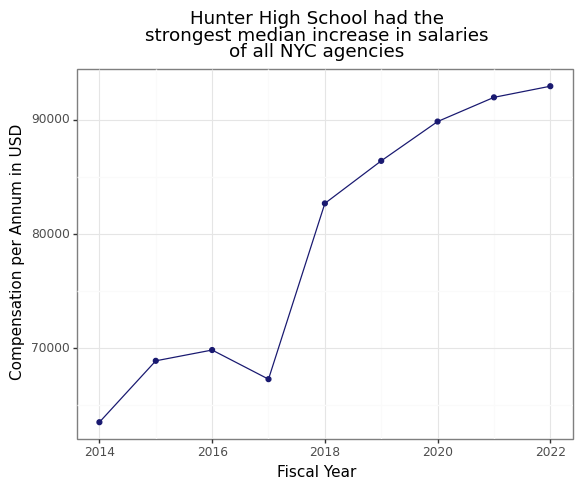

<ggplot: (181532559144)>

In [175]:
p = (
    ggplot(data=(data
                 .query('pay_basis == "per Annum"')
                 .assign(total_compensation=lambda x: x['base_salary'] + x['total_ot_paid'] + x['total_other_pay'])
                 .query("agency_name == 'HUNTER COLLEGE HIGH SCHOOL'")
                 .groupby("fiscal_year")
                 .agg(comp=("total_compensation", np.median),
                      n=("total_compensation", "count"))
                 .reset_index()
                 ),
           mapping=aes(x="fiscal_year", y="comp")
           ) +
    geom_line(colour="midnightblue") +
    geom_point(colour="midnightblue") +
    labs(title="Hunter High School had the\nstrongest median increase in salaries\nof all NYC agencies",
         y="Compensation per Annum in USD", x="Fiscal Year") +
    theme_bw() 
)

p

In [176]:
p.save(dpi=300, filename="python2.png", width=6, height=4)

C:\Users\mathi\AppData\Roaming\Python\Python310\site-packages\plotnine\ggplot.py:718: PlotnineWarning: Saving 6 x 4 in image.
C:\Users\mathi\AppData\Roaming\Python\Python310\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Filename: python2.png



### Pay by gender? Need to classify names using some library

In [160]:
from gender_guesser import detector as gender

In [161]:
guesser = gender.Detector(case_sensitive=False)

In [162]:
guesser.get_gender("Jannes")

'male'

In [163]:
data["first_name"] = data["first_name"].astype(str)

In [164]:
# add sex column based on first names
data = (data
        .assign(sex=lambda df: df["first_name"].apply(guesser.get_gender))
        .assign(sex=lambda x: np.select(condlist=[
            x["sex"].isin(["female", "mostly_female"]),
            x["sex"].isin(["male", "mostly_male"])
        ], choicelist=[
            "female",
            "male"
        ], default=pd.NA
        ))
        )


### Which jobs are predominantly male and female?

In [166]:
print("Jobs with lowest female employment and more than 1,000 occurences:")

(data
    .value_counts(["title_description", "sex"])
    .reset_index(name="count")
    .pivot(columns="sex", values="count", index="title_description")
    .reset_index()
    .rename_axis(None, axis=1)
    .fillna(0)
    .assign(total = lambda x: x["female"] + x["male"],
            female_perc = lambda x: x["female"] / (x["female"] + x["male"]))
    .query("total > 1000 and female_perc < 0.05")
    .sort_values("female_perc")
    .style.bar("female_perc", color="forestgreen")

)

Jobs with lowest female employment and more than 1,000 occurences:


,title_description,female,male,total,female_perc
1737,SUPERVISOR OF MECHANICS,4.000000,2484.000000,2488.000000,0.001608
380,BATTALION CHIEF,12.000000,3642.000000,3654.000000,0.003284
1074,FIRE MARSHAL,8.000000,1116.000000,1124.000000,0.007117
1580,SENIOR SEWAGE TREATMENT WORKER,14.000000,1847.000000,1861.000000,0.007523
1582,SENIOR STATIONARY ENGINEER,8.000000,1049.000000,1057.000000,0.007569
375,AUTO MECHANIC,97.000000,8642.000000,8739.000000,0.011100
1600,SEWAGE TREATMENT WORKER,69.000000,5933.000000,6002.000000,0.011496
948,ELECTRICIAN,62.000000,5103.000000,5165.000000,0.012004
1077,FIREFIGHTER,1111.000000,75840.000000,76951.000000,0.014438
1340,PLUMBER,54.000000,3343.000000,3397.000000,0.015896


### Median Male and Median Female Salaries over Time

In [52]:
(data
    .query('pay_basis == "per Annum"')
    .assign(total_compensation=lambda x: x['base_salary'] + x['total_ot_paid'] + x['total_other_pay'])
    .groupby(["fiscal_year", "sex"])
    .agg(salary = ("total_compensation", "median"))
    .reset_index()
    .pivot(index="fiscal_year", columns="sex", values="salary")
    .reset_index()
    .rename_axis(None, axis=1)
    .assign(gap = lambda x: x["female"] / x["male"])
)

,fiscal_year,female,male,gap
0,2014,65570.720,81494.00,0.804608
1,2015,67725.860,82900.00,0.816959
2,2016,69156.510,81849.48,0.844923
3,2017,71164.405,85053.00,0.836707
4,2018,74007.335,88975.48,0.831772
5,2019,75864.405,90354.82,0.839628
6,2020,81575.000,96724.68,0.843373
7,2021,86318.920,99292.63,0.869339
8,2022,89170.570,101180.49,0.881302


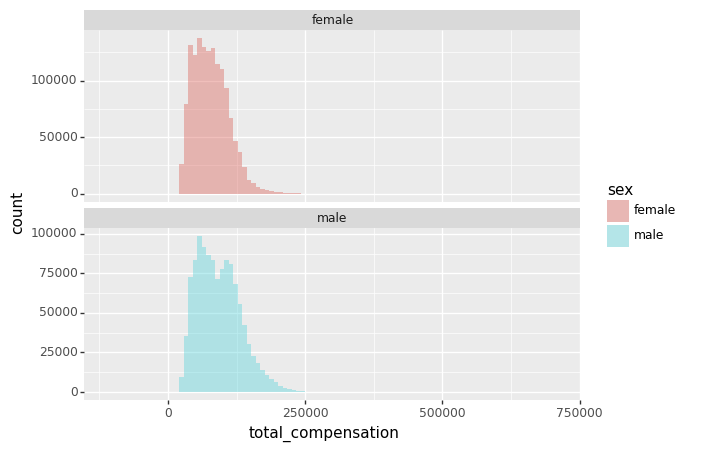

<ggplot: (129389363810)>

In [57]:
(
    ggplot(data=(data
                 .query('pay_basis == "per Annum"')
                 .assign(total_compensation=lambda x: x['base_salary'] + x['total_ot_paid'] + x['total_other_pay'])
                 .filter(["total_compensation", "sex"])
                 .dropna()),
           mapping=aes(x = "total_compensation")) +
    geom_histogram(aes(fill="sex"), bins=100, position="identity", alpha=0.4) +
    facet_wrap("~ sex", scales="free_y", nrow = 2)
)


## NYC Dogs

In [3]:
# read in 
data = pd.read_csv("C:/Users/mathi/Downloads/NYC Dogs/NYC_Dog_Licensing_Dataset.csv",
                   parse_dates=["LicenseIssuedDate", "LicenseExpiredDate"])

# clean horrible headers
data = janitor.clean_names(data)

# add columns
data["age"] = data["extract_year"] - data["animalbirthyear"]

In [4]:
data.head()

,animalname,animalgender,animalbirthyear,breedname,zipcode,licenseissueddate,licenseexpireddate,extract_year,age
0,PAIGE,F,2014,American Pit Bull Mix / Pit Bull Mix,10035.0,2014-09-12,2017-09-12,2016,2
1,YOGI,M,2010,Boxer,10465.0,2014-09-12,2017-10-02,2016,6
2,ALI,M,2014,Basenji,10013.0,2014-09-12,2019-09-12,2016,2
3,QUEEN,F,2013,Akita Crossbreed,10013.0,2014-09-12,2017-09-12,2016,3
4,LOLA,F,2009,Maltese,10028.0,2014-09-12,2017-10-09,2016,7


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508196 entries, 0 to 508195
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   animalname          507169 non-null  object        
 1   animalgender        508175 non-null  object        
 2   animalbirthyear     508196 non-null  int64         
 3   breedname           508196 non-null  object        
 4   zipcode             508187 non-null  float64       
 5   licenseissueddate   508196 non-null  datetime64[ns]
 6   licenseexpireddate  508119 non-null  datetime64[ns]
 7   extract_year        508196 non-null  int64         
 8   age                 508196 non-null  int64         
dtypes: datetime64[ns](2), float64(1), int64(3), object(3)
memory usage: 34.9+ MB


### Which breeds are how old?

In [6]:
data.value_counts("breedname")

breedname
Unknown               46973
Yorkshire Terrier     30212
Shih Tzu              27623
Chihuahua             21035
Labrador Retriever    15693
                      ...  
LAB/SPANIEL X             1
LAB/SPANIEL MIX           1
LAB/SHIBA INU  X          1
LAB/SHEPHERD X            1
zuchon                    1
Length: 1567, dtype: int64

Way too many breeds to all look at, just save the top 10:

In [22]:
breeds = data.value_counts("breedname").head(20).index.tolist()
breeds

['Unknown',
 'Yorkshire Terrier',
 'Shih Tzu',
 'Chihuahua',
 'Labrador Retriever',
 'Maltese',
 'Labrador Retriever Crossbreed',
 'American Pit Bull Mix / Pit Bull Mix',
 'American Pit Bull Terrier/Pit Bull',
 'Pomeranian',
 'Shih Tzu Crossbreed',
 'Havanese',
 'Poodle Crossbreed',
 'Beagle',
 'Chihuahua Crossbreed',
 'Golden Retriever',
 'German Shepherd Dog',
 'French Bulldog',
 'Shiba Inu',
 'Jack Russell Terrier']

In [31]:
(data
    .query("breedname in @breeds")
    .groupby("breedname")
    .agg(age = ("age", "mean"),
         count = ("age", "count"))
    .reset_index()
    .sort_values("age", ascending=False)
    .style.bar("age", color="forestgreen")
)

,breedname,age,count
18,Unknown,8.611905,46973
9,Jack Russell Terrier,7.816488,6332
3,Chihuahua,7.225909,21035
12,Maltese,6.864025,15672
2,Beagle,6.799036,7673
16,Shih Tzu,6.714586,27623
19,Yorkshire Terrier,6.344234,30212
10,Labrador Retriever,6.264131,15693
8,Havanese,6.018153,8924
7,Golden Retriever,5.943924,7579


### Are there changes in popularity of breed over time?

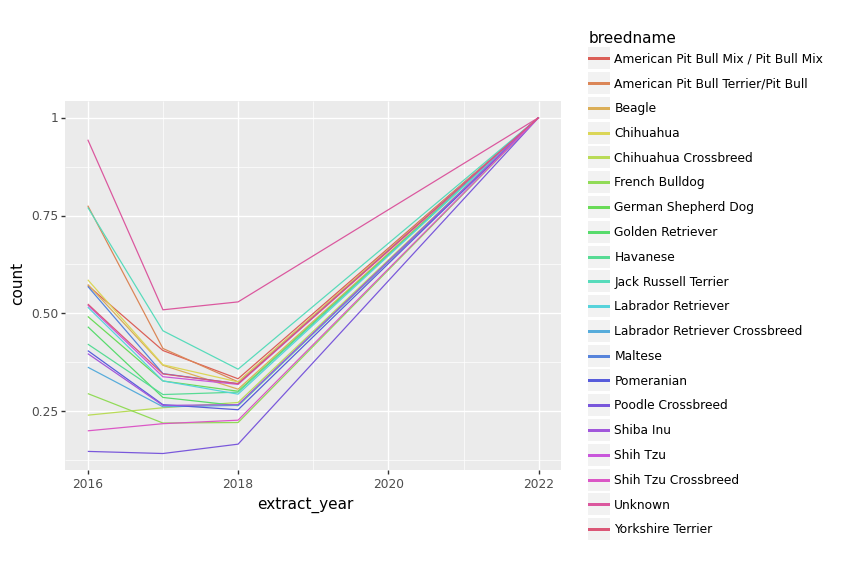

<ggplot: (181235687746)>

In [59]:
(
    ggplot(data=(data
                 .query('breedname in @breeds')
                 .groupby(['breedname', 'extract_year'])
                 .size()
                 .reset_index(name='count')
                 .sort_values(['breedname', 'extract_year'])
                 .assign(count=lambda x: x["count"] / x.groupby("breedname")["count"].transform("max"))
                 ),
    mapping=aes(x="extract_year", y="count", colour="breedname")) +
    geom_line()
)


### Which breeds are most popular where?

In [65]:
(data
    .query("breedname in @breeds")
    .value_counts(["breedname", "zipcode"])
    .reset_index(name="count")
    .groupby("breedname")
    .nth(1)
)

,zipcode,count
breedname,,
American Pit Bull Mix / Pit Bull Mix,11215.0,225
American Pit Bull Terrier/Pit Bull,11385.0,184
Beagle,11215.0,165
Chihuahua,10025.0,372
Chihuahua Crossbreed,10029.0,157
French Bulldog,11201.0,202
German Shepherd Dog,10312.0,162
Golden Retriever,10023.0,260
Havanese,10023.0,330


Without population data: Useless information

### What is the most used dog name each year for male and female?

In [100]:
(data
    .value_counts(["animalgender", "extract_year", "animalname"])
    .reset_index(name="count")
    .query("animalname not in ['NAME NOT PROVIDED', 'UNKNOWN']")
    .sort_values(["animalgender", "extract_year", "count"], ascending=False)
    .groupby(["animalgender", "extract_year"])
    .apply(lambda x: x[x["count"] == x["count"].max()])
    .reset_index(drop=True)
)

,animalgender,extract_year,animalname,count
0,F,2016,BELLA,1252
1,F,2017,BELLA,851
2,F,2018,BELLA,812
3,F,2022,BELLA,2764
4,M,2016,MAX,1176
5,M,2017,MAX,778
6,M,2018,MAX,725
7,M,2022,MAX,2161


In [123]:
(data
    .value_counts(["animalgender", "animalbirthyear", "animalname"])
    .reset_index(name="count")
    .query("animalname not in ['NAME NOT PROVIDED', 'UNKNOWN']")
    .sort_values(["animalgender", "animalbirthyear", "count"], ascending=False)
    .groupby(["animalgender", "animalbirthyear"])
    .nth(0)
    .reset_index()
    .pivot(index="animalbirthyear", columns="animalgender", values="animalname")
    .reset_index()
    .rename_axis(None, axis=1)
    .fillna("-")
)

,animalbirthyear,F,M
0,1991,MOZZARELLA,LUIGI
1,1992,CINNY,DIEGOO
2,1993,TOCCATA,TREY
3,1994,DIAMOND,NICKY
4,1995,PRINCESS,ODIE
5,1996,BONNIE,DOC
6,1997,PEANUT,ROCKY
7,1998,MAGGIE,CAPONE
8,1999,DAISY,BUDDY
9,2000,LUCY,MAX
